In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [ ]:
start = datetime.datetime(2022,11,25)
end = datetime.datetime(2023,11,25)
ws = yf.download('HAL.NS',start,end)
ws['SMA30'] = ws['Close'].rolling(30).mean()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
ws.head()

,Open,High,Low,Close,Adj Close,Volume,SMA30
Date,,,,,,,
2022-11-25,1366.000000,1387.474976,1361.500000,1365.775024,1336.237671,1506132,NaN
2022-11-28,1370.349976,1386.099976,1366.599976,1381.275024,1351.402466,1508604,NaN
2022-11-29,1383.000000,1386.699951,1369.525024,1376.074951,1346.314819,986228,NaN
2022-11-30,1376.074951,1384.474976,1360.775024,1377.025024,1347.244385,962258,NaN
2022-12-01,1380.000000,1383.724976,1366.150024,1377.699951,1347.904785,859294,NaN


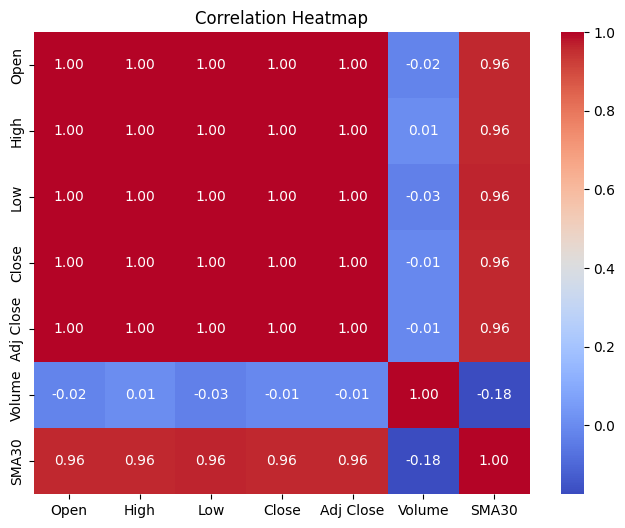

In [ ]:
# Calculate the correlation matrix
correlation_matrix = ws.corr()
# Create a heatmap
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")  # Optional: Set the title
# Display the heatmap
plt.show()

In [ ]:

ws['Close'] = ws['Close'].round(2)
date = ws.index
ws['Underlying Log Returns (C)'] = np.log(ws['Close'] / ws['Close'].shift(1))
ws['Underlying Log Returns (C)'] = ws['Underlying Log Returns (C)'].round(4)
ws.index = range(len(ws))
ws.loc[0,'Previous Day Underlying Volatility (D)'] = 0.0223

index=1
print(ws.at[0, 'Previous Day Underlying Volatility (D)'])
print(ws.at[index-1,'Previous Day Underlying Volatility (D)'])
print(ws.at[1, 'Underlying Log Returns (C)'])

# Calculate 'Current Day Underlying Daily Volatility (E)' iteratively
for index in range(1, len(ws)):  # Start from index + 1
          # For the first row, the formula uses the initial 'Previous Day Underlying Volatility (D)'
          ws.at[index, 'Current Day Underlying Daily Volatility (E)'] = np.sqrt(0.995 * ws.at[index-1,'Previous Day Underlying Volatility (D)'] ** 2 + 0.005 * ws.at[index,'Underlying Log Returns (C)'] ** 2)
          # ws['Current Day Underlying Daily Volatility (E)'] = ws['Current Day Underlying Daily Volatility (E)'].round(4)
          ws.at[index, 'Previous Day Underlying Volatility (D)'] = ws.at[index, 'Current Day Underlying Daily Volatility (E)']
# Assuming df is your DataFrame
#ws = ws.drop(ws.index[-1])
ws.index=date
ws['Current Day Underlying Daily Volatility (E)'] = ws['Current Day Underlying Daily Volatility (E)']
ws = ws.iloc[1:]

0.0223
0.0223
0.0113


In [ ]:
ws.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA30,Underlying Log Returns (C),Previous Day Underlying Volatility (D),Current Day Underlying Daily Volatility (E)
Date,,,,,,,,,,
2023-11-20,2137.300049,2167.000000,2116.000000,2146.60,2146.600098,1452454,1956.291667,0.0096,0.018845,0.018845
2023-11-21,2154.000000,2161.949951,2135.000000,2144.30,2144.300049,832725,1962.565002,-0.0011,0.018798,0.018798
2023-11-22,2144.949951,2152.100098,2088.949951,2112.10,2112.100098,1014171,1968.940007,-0.0151,0.018781,0.018781
2023-11-23,2116.949951,2159.000000,2107.649902,2146.25,2146.250000,1259937,1975.166675,0.0160,0.018769,0.018769
2023-11-24,2154.899902,2251.000000,2145.750000,2240.30,2240.300049,2909879,1984.456677,0.0429,0.018966,0.018966


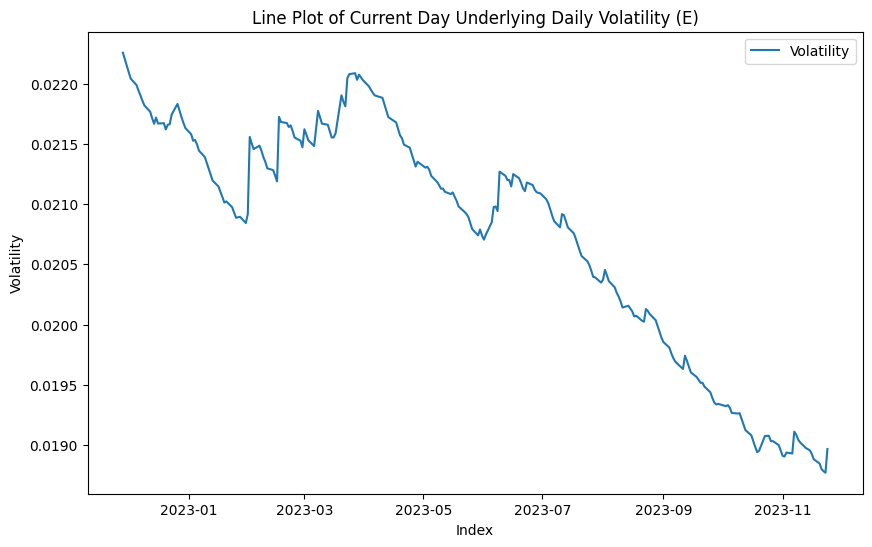

In [ ]:
# Assuming you have your DataFrame 'ws' with the relevant data
# Create a line plot of 'Current Day Underlying Daily Volatility (E)'
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(ws.index, ws['Current Day Underlying Daily Volatility (E)'], label='Volatility')
plt.xlabel('Index')  # Optional: Set the x-axis label
plt.ylabel('Volatility')  # Optional: Set the y-axis label
plt.title('Line Plot of Current Day Underlying Daily Volatility (E)')  # Optional: Set the title
plt.legend()  # Optional: Show the legend

# Display the plot
plt.show()


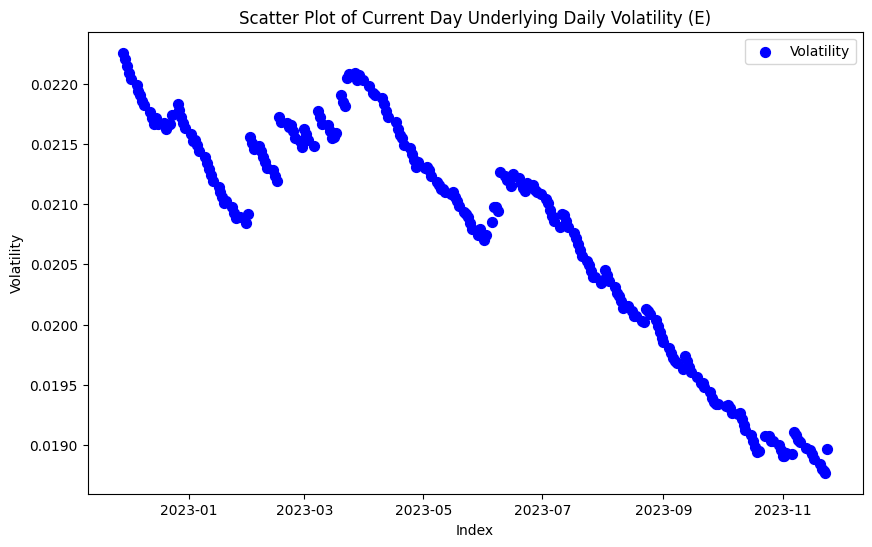

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your DataFrame 'ws' with the relevant data

# Create a scatter plot of 'Current Day Underlying Daily Volatility (E)'
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.scatter(ws.index, ws['Current Day Underlying Daily Volatility (E)'], label='Volatility', marker='o', s=50, c='blue')
plt.xlabel('Index')  # Optional: Set the x-axis label
plt.ylabel('Volatility')  # Optional: Set the y-axis label
plt.title('Scatter Plot of Current Day Underlying Daily Volatility (E)')  # Optional: Set the title
plt.legend()  # Optional: Show the legend
# Display the plot
plt.show()

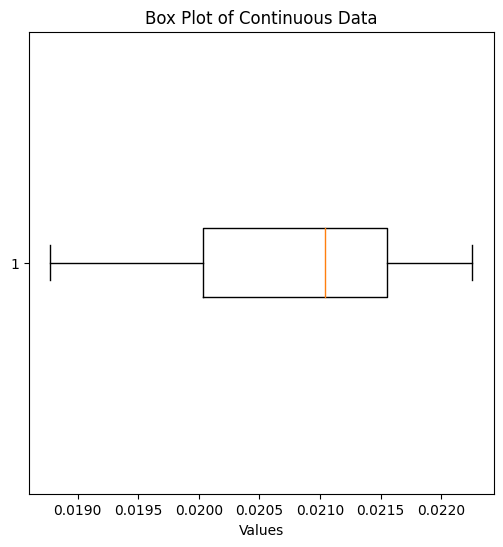

In [ ]:
# Create a box plot
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
plt.boxplot(ws['Current Day Underlying Daily Volatility (E)'], vert=False)  # Create a horizontal box plot (vert=False)
plt.xlabel('Values')  # Optional: Set the x-axis label
plt.title('Box Plot of Continuous Data')  # Optional: Set the title
# Display the plot
plt.show()

<ipython-input-11-065e43bdf794>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ws['Current Day Underlying Daily Volatility (E)'], shade=True)  # Create a density plot with shading


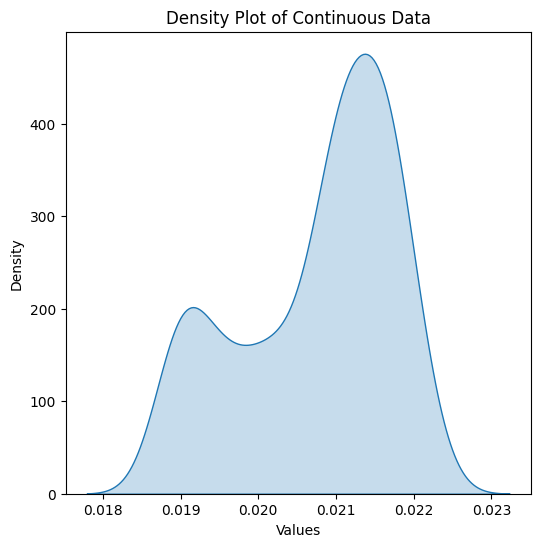

In [ ]:
# Create a density plot (Kernel Density Estimation)
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
sns.kdeplot(ws['Current Day Underlying Daily Volatility (E)'], shade=True)  # Create a density plot with shading
plt.xlabel('Values')  # Optional: Set the x-axis label
plt.ylabel('Density')  # Optional: Set the y-axis label
plt.title('Density Plot of Continuous Data')  # Optional: Set the title
# Display the plot
plt.show()

In [ ]:
ws.head()

,Open,High,Low,Close,Adj Close,Volume,SMA30,Underlying Log Returns (C),Previous Day Underlying Volatility (D),Current Day Underlying Daily Volatility (E)
Date,,,,,,,,,,
2022-11-28,1370.349976,1386.099976,1366.599976,1381.28,1351.402466,1508604,NaN,0.0113,0.022259,0.022259
2022-11-29,1383.000000,1386.699951,1369.525024,1376.07,1346.314819,986228,NaN,-0.0038,0.022204,0.022204
2022-11-30,1376.074951,1384.474976,1360.775024,1377.03,1347.244385,962258,NaN,0.0007,0.022149,0.022149
2022-12-01,1380.000000,1383.724976,1366.150024,1377.70,1347.904785,859294,NaN,0.0005,0.022093,0.022093
2022-12-02,1376.199951,1403.500000,1372.500000,1387.12,1357.125854,1871954,NaN,0.0068,0.022043,0.022043


In [ ]:
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Underlying Log Returns (C)',	'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

In [ ]:
last_x = x.iloc[-5:]
last_y = y.iloc[-5:]
x = x.iloc[:-5]
y = y.iloc[:-5]

In [ ]:
last_x

,Open,High,Low,Close,Adj Close,Volume,Underlying Log Returns (C),Previous Day Underlying Volatility (D)
Date,,,,,,,,
2023-11-20,2137.300049,2167.000000,2116.000000,2146.60,2146.600098,1452454,0.0096,0.018845
2023-11-21,2154.000000,2161.949951,2135.000000,2144.30,2144.300049,832725,-0.0011,0.018798
2023-11-22,2144.949951,2152.100098,2088.949951,2112.10,2112.100098,1014171,-0.0151,0.018781
2023-11-23,2116.949951,2159.000000,2107.649902,2146.25,2146.250000,1259937,0.0160,0.018769
2023-11-24,2154.899902,2251.000000,2145.750000,2240.30,2240.300049,2909879,0.0429,0.018966


In [ ]:
last_y

Date
2023-11-20    0.018845
2023-11-21    0.018798
2023-11-22    0.018781
2023-11-23    0.018769
2023-11-24    0.018966
Name: Current Day Underlying Daily Volatility (E), dtype: float64

In [ ]:
x

,Open,High,Low,Close,Adj Close,Volume,Underlying Log Returns (C),Previous Day Underlying Volatility (D)
Date,,,,,,,,
2022-11-28,1370.349976,1386.099976,1366.599976,1381.28,1351.402466,1508604,0.0113,0.022259
2022-11-29,1383.000000,1386.699951,1369.525024,1376.07,1346.314819,986228,-0.0038,0.022204
2022-11-30,1376.074951,1384.474976,1360.775024,1377.03,1347.244385,962258,0.0007,0.022149
2022-12-01,1380.000000,1383.724976,1366.150024,1377.70,1347.904785,859294,0.0005,0.022093
2022-12-02,1376.199951,1403.500000,1372.500000,1387.12,1357.125854,1871954,0.0068,0.022043
...,...,...,...,...,...,...,...,...
2023-11-10,2041.650024,2110.949951,1995.000000,2058.90,2058.899902,4755794,0.0137,0.019021
2023-11-13,2072.000000,2075.000000,2041.800049,2060.35,2060.350098,1183911,0.0007,0.018973
2023-11-15,2066.050049,2105.000000,2040.550049,2091.00,2091.000000,1634396,0.0148,0.018955


In [ ]:
x.shape

(242, 8)

In [ ]:

y.shape

(242,)

Polynomial regression

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# x_train=x_train.to_numpy().reshape(-1,1)
# print(x_train.shape)

(193, 8)
(49, 8)
(193,)
(49,)


In [ ]:
x_test.dtypes

Open                                      float64
High                                      float64
Low                                       float64
Close                                     float64
Adj Close                                 float64
Volume                                      int64
Underlying Log Returns (C)                float64
Previous Day Underlying Volatility (D)    float64
dtype: object

In [ ]:
x_test.head()

,Open,High,Low,Close,Adj Close,Volume,Underlying Log Returns (C),Previous Day Underlying Volatility (D)
Date,,,,,,,,
2023-02-28,1292.500000,1303.500000,1278.074951,1287.15,1259.312988,1522170,0.0004,0.021474
2023-02-20,1322.000000,1322.000000,1281.875000,1293.57,1265.598999,2273804,-0.0199,0.021674
2023-09-01,1959.900024,1989.400024,1954.500000,1970.88,1970.875000,1778540,0.0106,0.019853
2023-10-06,1945.150024,1964.000000,1943.000000,1956.10,1956.099976,1029633,0.0063,0.019265
2023-05-10,1463.000000,1480.000000,1457.500000,1477.20,1466.206421,969060,0.0137,0.021129


In [ ]:
poly = PolynomialFeatures(degree=8)#on degree 1 it gives exact values on 2 less accurate and 3 may be a sort of best fit to the algorithm
X_poly = poly.fit_transform(x_train)
X_poly_test = poly.fit_transform(x_test)
X_poly_testf = poly.fit_transform(last_x)
poly.fit(X_poly,y_train)
lin2=LinearRegression()
lin2.fit(X_poly,y_train)

LinearRegression()

In [ ]:
y_pred=lin2.predict(X_poly_test)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)

Mean Squared Error: 0.0003954239931973778
Mean aboslute Error: 0.0037850693954662967
Mean absolute percentage Error: 0.1750171195028448


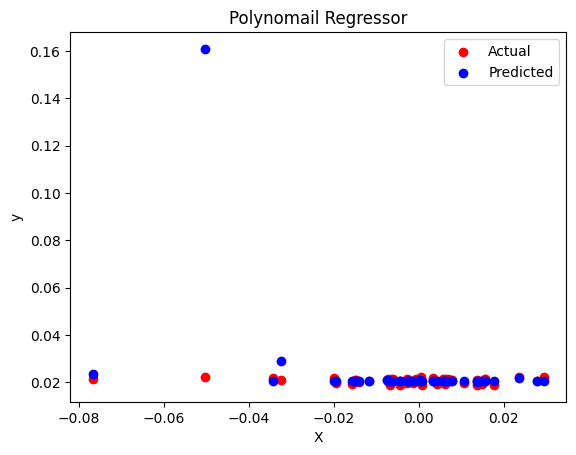

In [ ]:
xtes=x_test['Underlying Log Returns (C)']
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Polynomail Regressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
print(y_pred[:10])


[0.02073217 0.02077043 0.0207232  0.02072811 0.02072832 0.02072789
 0.0207297  0.02072128 0.02072825 0.0218338 ]


In [ ]:
print(x_test[:10])

                   Open         High          Low    Close    Adj Close  \
Date                                                                      
2023-02-28  1292.500000  1303.500000  1278.074951  1287.15  1259.312988   
2023-02-20  1322.000000  1322.000000  1281.875000  1293.57  1265.598999   
2023-09-01  1959.900024  1989.400024  1954.500000  1970.88  1970.875000   
2023-10-06  1945.150024  1964.000000  1943.000000  1956.10  1956.099976   
2023-05-10  1463.000000  1480.000000  1457.500000  1477.20  1466.206421   
2023-11-13  2072.000000  2075.000000  2041.800049  2060.35  2060.350098   
2023-07-05  1860.974976  1874.500000  1845.000000  1867.45  1853.552124   
2023-10-05  1935.150024  1972.000000  1931.150024  1943.85  1943.849976   
2023-11-02  1835.000000  1858.300049  1823.000000  1855.45  1855.449951   
2023-03-27  1262.500000  1318.000000  1262.500000  1314.53  1304.742188   

             Volume  Underlying Log Returns (C)  \
Date                                            

In [ ]:
y_pred=lin2.predict(X_poly_testf)
print(y_pred.round(4))

[0.0207 0.0207 0.0207 0.0207 0.0205]


2.KNN Regressor

Mean Squared Error: 1.016960833081212e-06
Mean aboslute Error: 0.0007972195124854583
Mean absolute percentage Error: 0.03936766769878222


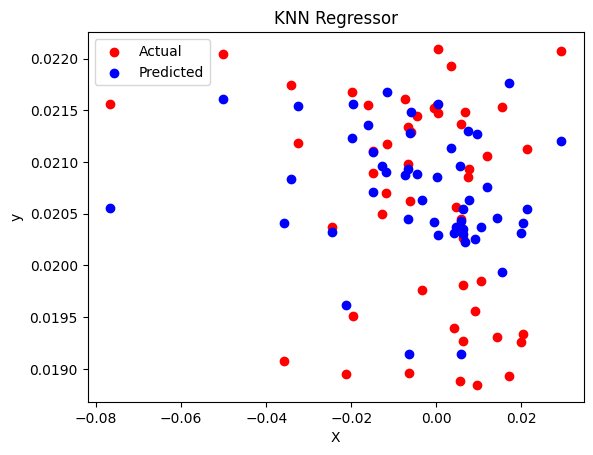

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Underlying Log Returns (C)',	'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Create KNN regressor object
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test['Underlying Log Returns (C)']
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('KNN Regressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

3.SVM REGRESSOR

Best Hyperparameters: {'kernel': 'poly', 'gamma': 1.6885839590890317, 'epsilon': 1.118696723040602, 'C': 770.589609131744}
Mean Squared Error: 1.032060591642652e-06
Mean aboslute Error: 0.0009014976577620418
Mean absolute percentage Error: 0.04407993755770644
Mean Squared Error with Best Hyperparameters: 1.032060591642652e-06


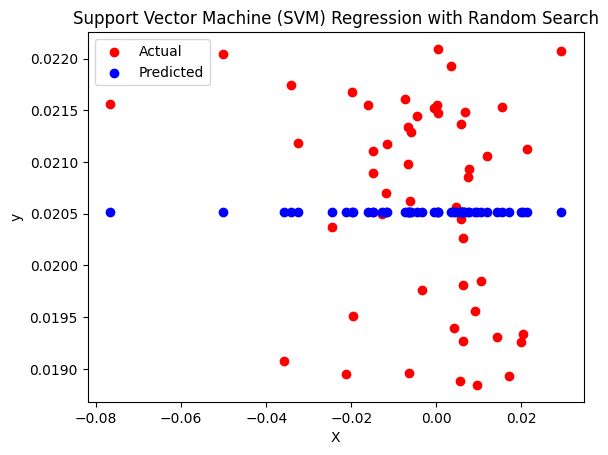

In [ ]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Define the parameter grid for random search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.random.rand(20) * 1000,
    'gamma': np.random.rand(20) * 10,
    'epsilon': np.random.rand(20) * 2
}

# Create SVR object
svr = SVR()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=svr, param_distributions=param_grid,
                                  scoring='neg_mean_squared_error', cv=5, n_iter=100)

random_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Apply the best hyperparameters to SVR
best_svr = SVR(**best_params)

# Fit the model on the training data with the best hyperparameters
best_svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
print(f'Mean Squared Error with Best Hyperparameters: {mse}')

xtes = X_test['Underlying Log Returns (C)']

# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Support Vector Machine (SVM) Regression with Random Search')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


4.ARIMA (AutoRegressive Integrated Moving Average)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Mean Squared Error: 1.0353856452880864e-05
Mean aboslute Error: 0.0013274824842878477
Mean absolute percentage Error: 0.06430665849755526
Mean Squared Error: 1.0353856452880864e-05
(50, 7)
(50,)


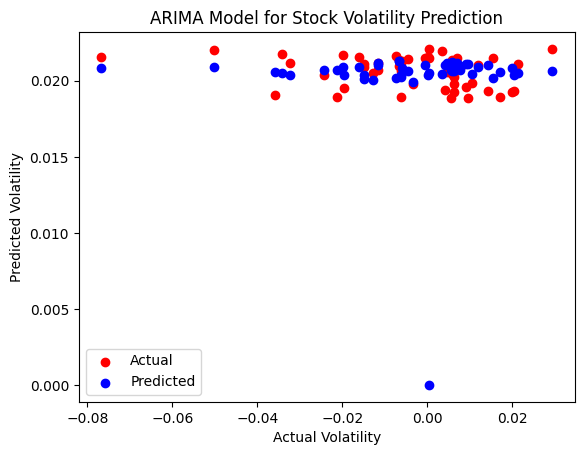

In [ ]:
import statsmodels.api as sm

# Prepare the data for ARIMA
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)']]
y = ws['Current Day Underlying Daily Volatility (E)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
# Fit the ARIMA model
arima_model = sm.tsa.arima.ARIMA(y_train, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# Make predictions on the test data
y_pred = arima_model_fit.predict(start=0, end=len(x_test)-1)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
print("Mean Squared Error:", mse)
print(x_test.shape)
print(y_test.shape)
xtes=x_test['Underlying Log Returns (C)']
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('ARIMA Model for Stock Volatility Prediction')
plt.xlabel('Actual Volatility')
plt.ylabel('Predicted Volatility')
plt.legend()
plt.show()


In [ ]:
print(y_test.shape)
print(y_pred.shape)

(50,)
(50,)


5.Random forest regressor

Mean Squared Error: 5.506696624653327e-10
Mean aboslute Error: 1.612926201818417e-05
Mean absolute percentage Error: 0.000796978864309809


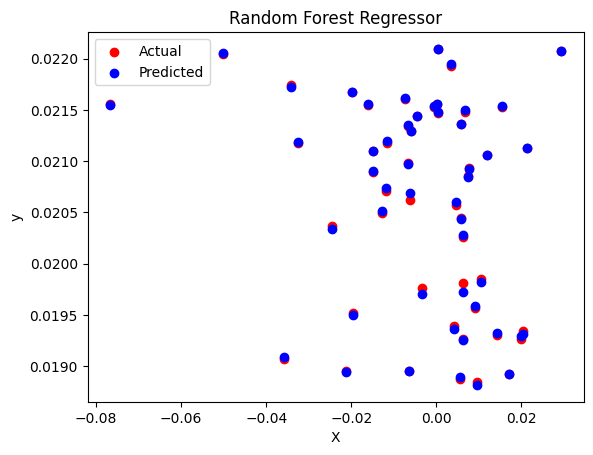

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Create Random Forest Regressor object
rf_regressor = RandomForestRegressor(n_estimators=100)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test['Underlying Log Returns (C)']
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Random Forest Regressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


6.LSTM

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=100)

# Create the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on the test data
y_pred = model.predict(X_test)



Epoch 1/100
7/7 [==============================] - 8s 24ms/step - loss: 3.4367e-04
Epoch 2/100
7/7 [==============================] - 0s 21ms/step - loss: 1.0652e-04
Epoch 3/100
7/7 [==============================] - 0s 20ms/step - loss: 4.8427e-05
Epoch 4/100
7/7 [==============================] - 0s 27ms/step - loss: 1.4913e-05
Epoch 5/100
7/7 [==============================] - 0s 24ms/step - loss: 1.2217e-05
Epoch 6/100
7/7 [==============================] - 0s 33ms/step - loss: 7.0692e-06
Epoch 7/100
7/7 [==============================] - 0s 21ms/step - loss: 3.2378e-06
Epoch 8/100
7/7 [==============================] - 0s 19ms/step - loss: 1.6192e-06
Epoch 9/100
7/7 [==============================] - 0s 20ms/step - loss: 9.0361e-07
Epoch 10/100
7/7 [==============================] - 0s 27ms/step - loss: 5.7976e-07
Epoch 11/100
7/7 [==============================] - 0s 23ms/step - loss: 2.9394e-07
Epoch 12/100
7/7 [==============================] - 0s 23ms/step - loss: 1.9638e-07
E

Mean Squared Error: 4.912863196741329e-08
Mean aboslute Error: 0.0001908284856813834
Mean absolute percentage Error: 0.009187018705305739
(50,)
(50,)


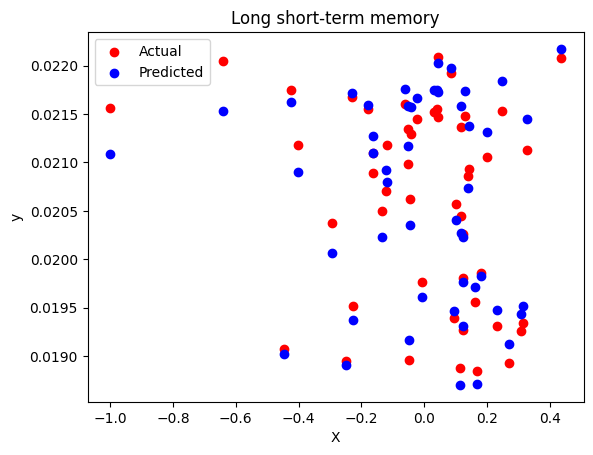

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test[:,6]
print(xtes.shape)
print(y_test.shape)
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Long short-term memory')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

7.RNN

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=100)

# Create the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.RNN(tf.keras.layers.SimpleRNNCell(64), return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.RNN(tf.keras.layers.SimpleRNNCell(32)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on the test data
y_pred = model.predict(X_test)


Epoch 1/100
7/7 [==============================] - 4s 11ms/step - loss: 0.0823
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0247
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0126
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0059
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0044
Epoch 6/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0026
Epoch 7/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0019
Epoch 8/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0012
Epoch 9/100
7/7 [==============================] - 0s 11ms/step - loss: 7.8823e-04
Epoch 10/100
7/7 [==============================] - 0s 14ms/step - loss: 5.9419e-04
Epoch 11/100
7/7 [==============================] - 0s 12ms/step - loss: 5.1354e-04
Epoch 12/100
7/7 [==============================] - 0s 17ms/step - loss: 3.5025e-04
Epoch 13/100
7/7 [===============

Mean Squared Error: 5.119093038323743e-05
Mean aboslute Error: 0.005887278597297407
Mean absolute percentage Error: 0.2808405248285358
(50,)
(50,)


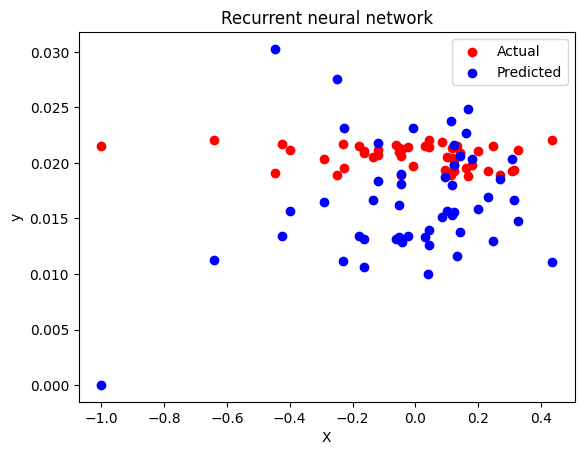

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test[:,6]
print(xtes.shape)
print(y_test.shape)
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Recurrent neural network')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()